# Assessing Credit Risk

## Part 1: set-up, visualize and pre - process the data 

In [1]:
#import the required packages

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the data file

In [ ]:
data_df = pd.read_csv('/Users/a_bailey8/Downloads/Data_Assignment.csv') # Loading the data file using pandas
data_df# Checking the data frame 

,loan_amnt,int_rate,installment,annual_inc,last_pymnt_amnt,tot_cur_bal,loan_status
0,18600,10.99,608.86,80000.0,15705.09,170238.0,Fully Paid
1,2000,17.97,72.28,55400.0,72.28,351452.0,Current
2,12000,12.29,400.24,60000.0,11281.15,18207.0,Fully Paid
3,16000,19.42,589.90,64000.0,589.90,12293.0,Current
4,22525,16.02,548.01,94080.0,21483.11,571244.0,Fully Paid
...,...,...,...,...,...,...,...
226062,5000,7.21,154.87,46000.0,154.87,37430.0,Current
226063,35000,21.85,963.68,70000.0,963.68,217083.0,Current
226064,1200,18.99,43.99,90000.0,1197.23,76125.0,Fully Paid
226065,12000,8.90,381.04,35000.0,9983.17,26386.0,Fully Paid


In [5]:
data_df.head()

,loan_amnt,int_rate,installment,annual_inc,last_pymnt_amnt,tot_cur_bal,loan_status
0,18600,10.99,608.86,80000.0,15705.09,170238.0,Fully Paid
1,2000,17.97,72.28,55400.0,72.28,351452.0,Current
2,12000,12.29,400.24,60000.0,11281.15,18207.0,Fully Paid
3,16000,19.42,589.90,64000.0,589.90,12293.0,Current
4,22525,16.02,548.01,94080.0,21483.11,571244.0,Fully Paid


In [6]:
data_df.isna().sum()

loan_amnt             0
int_rate              0
installment           0
annual_inc            0
last_pymnt_amnt       0
tot_cur_bal        7107
loan_status           0
dtype: int64

In [7]:
# In order to decrease the size of dataset, and avoid unnecessary predictions, we will drop the missing valuyes 
data_df.dropna(axis=0, how='any', inplace=True)
# Now we check for missing values again 
data_df.isna().sum()

loan_amnt          0
int_rate           0
installment        0
annual_inc         0
last_pymnt_amnt    0
tot_cur_bal        0
loan_status        0
dtype: int64

In [8]:
data_df.shape # Analysing the data and its dimensions 

(218960, 7)

In [9]:
data_df.columns # Checking what are the column names 

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'last_pymnt_amnt',
       'tot_cur_bal', 'loan_status'],
      dtype='object')

In [10]:
data_df.describe()

,loan_amnt,int_rate,installment,annual_inc,last_pymnt_amnt,tot_cur_bal
count,218960.000000,218960.000000,218960.000000,2.189600e+05,218960.000000,2.189600e+05
mean,15162.647059,13.109347,449.316971,7.851561e+04,3379.520748,1.426342e+05
std,9199.765373,4.848285,267.633754,8.318813e+04,6005.320827,1.614333e+05
min,1000.000000,5.310000,23.260000,0.000000e+00,0.000000,0.000000e+00
25%,8000.000000,9.490000,255.380000,4.696075e+04,310.380000,2.917875e+04
50%,13000.000000,12.620000,381.040000,6.500000e+04,588.195000,7.963850e+04
75%,20000.000000,15.990000,597.780000,9.435625e+04,3525.182500,2.135938e+05
max,40000.000000,30.990000,1714.540000,9.300000e+06,41253.540000,9.971659e+06


In [11]:
#visualize the data. Hint: make plots using the predictors and NOT the target variable "loan_status". 

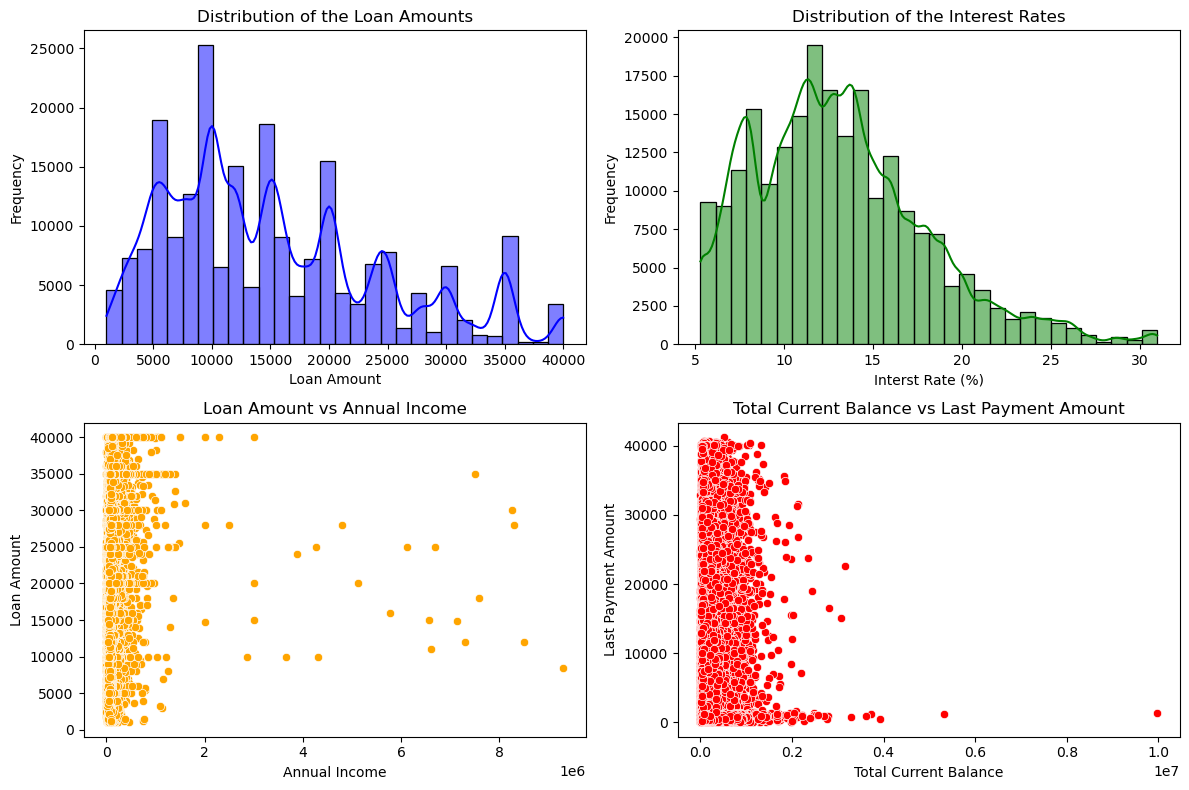

In [12]:
''' We visualise using the matplotlib library which we have imported earlier
Start with visualising the data using the predictors'''
plt.figure(figsize=(12,8))

'''We will create different plots and histograms for the predictors, after reviewing the tutorial labs, I have decided that 
it will be more suitable to use histogramms and scatter plots. I will comment the code to explain what I am doing '''

# We start with Plot 1: Histogram of Loan Amounts
#This shows the distribution of the 'loan_amount' column
plt.subplot(2,2,1) # Position in a 2x2 grid of first subplot
sns.histplot(data_df['loan_amnt'], bins = 30, kde=True, color='blue') # Histogram with KDE using seaborn libraries
plt.title('Distribution of the Loan Amounts') # Set the title for the plot 
plt.xlabel('Loan Amount') # Set the x axis label name 
plt.ylabel('Frequency') # Set the y axis label name



# Now the Plot 2: Interest Rate Distribution 
# Showing the distribution of the 'int_rate' column 
plt.subplot(2,2,2) # Position the 2x2 groid for the second subplot
sns.histplot(data_df['int_rate'], bins =30, kde=True, color='green') # Histogram with kde using seaborn 
plt.title('Distribution of the Interest Rates') # Sets the title of the plot 
plt.xlabel('Interst Rate (%)') # Sets the name for the x axis, I have additionally specified that the infomration is percentage 
plt.ylabel('Frequency') # Sets the name label for the y axis 


# Now Plot3 : This is a scatter plot of the Loan Amount vs Annual Income 
# Referring to week 3 lab, I am visualising the relationship between 'annual_inc' and 'loan_amnt' using the seaborn scatterplot
plt.subplot(2,2,3) # Set and position the 2x2 grid, third subplot 
sns.scatterplot(x=data_df['annual_inc'], y=data_df['loan_amnt'], color = 'orange')
plt.title('Loan Amount vs Annual Income') # This sets the title for the plot 
plt.xlabel('Annual Income') # This sets the name for the x axis label 
plt.ylabel('Loan Amount') # This sets the name for the y axis label

# Now we Plot 4: This is a Scatterplot of the Total  Current Balance vs Last Payment Amount 
# I am visualising the relationship between 'total_cur_bal' and 'last_pymnt_amnt' using the seaborn and matplolib libraries 
plt.subplot(2,2,4) # Set the positioning in a 2x2 grid, this is a fourth subplot
sns.scatterplot(x=data_df['tot_cur_bal'], y = data_df['last_pymnt_amnt'], color = 'red') # Creates scatterplot using seaborn 
plt.title('Total Current Balance vs Last Payment Amount') # Sets the title for the plot 
plt.xlabel('Total Current Balance') # Sets the name for the x axis label
plt.ylabel('Last Payment Amount') # Sets the name for the y axis label 

# Using tight_layout function we adjust the layout for view of the plots(spacing and visibility)
plt.tight_layout()

#Display the plot
plt.show()



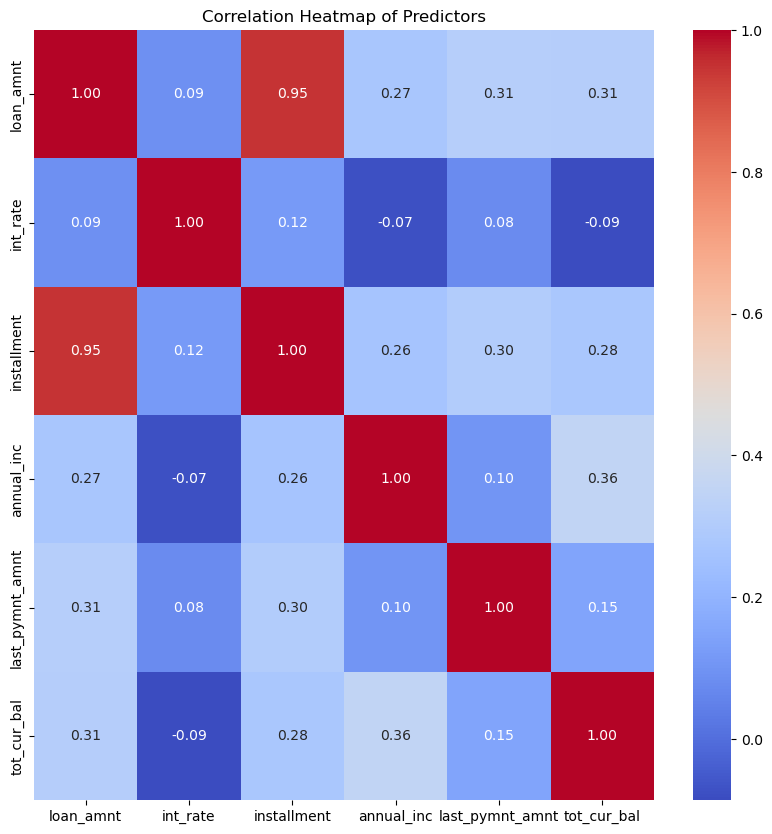

In [13]:
''' Additionally, to inspect the correlation between the variables, we plot the heatmap'''
# Filter the DataFrame to include only numeric columns(temporary, will not be used in the project, it was done because I kept encountering error
numeric_df = data_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap 
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)  # Plot the heatmap
ax.set_title('Correlation Heatmap of Predictors')  # Set the title for the heatmap
plt.show()


In [14]:
#create the dummy variable "loan_dummy". The variable we want to predict is loan_status. 
#In particular, we want to predict the probability that a mortgage is Charged Off from the bank book. Please see the code below 
#for extra help. The variable "loan_status" contains many different categories. Our focus is on the "Charged off" category. 
#You can create a dummy where "Charged off" equals 1, otherwise 0. (note: df is the name of the dataframe).
#Hint: you can use the code below to create the dummy.

In [15]:
# Implementing the hint create the dummy variable 'loan_dummy'
# This step focuses on transforming the 'loan_status' column into a binary format where:
# 'Charged Off' = 1 (indicating a mortgage that was charged off)
# All other statuses = 0
# This transformation helps us focus on predicting the probability of a "Charged Off" status.

data_df["loan_dummy"] = np.where(data_df["loan_status"] == "Charged Off", 1, 0)

In [16]:
#  I will validate the creation of the dummy variable, this is done to ensure that the transformation has been correctly applied 
# Then we display the first few rows of the dataframe to confirm that the 'loan_dummy' variable correctly maps the 'loan_status'


print("Preview of 'loan_status' and 'loan_dummy':")
print(data_df[["loan_status", "loan_dummy"]].head())


Preview of 'loan_status' and 'loan_dummy':
  loan_status  loan_dummy
0  Fully Paid           0
1     Current           0
2  Fully Paid           0
3     Current           0
4  Fully Paid           0


In [17]:
# Now we analyse the distribution of the 'loan_dummy' 
''' This is done in to understand the distribution that helps us to identify if there is a class imbalance
since the class imbalance impacts the performance of the models'''


# Count the number of instances where loan_dummy = 1 (Charged Off) and loan_dummy = 0 (others)
loan_dummy_distribution = data_df["loan_dummy"].value_counts()

# Calculate the percentage representation of each category in 'loan_dummy'
loan_dummy_percentage = data_df["loan_dummy"].value_counts(normalize=True) * 100

In [18]:
# We now display the distribution information gathered before 
# Printing the results to provide a detailed understanding of the dataset composition with respect to 'loan_dummy'.
print("\nDistribution of 'loan_dummy' (Count of each category):")
print(loan_dummy_distribution)

print("\nPercentage Distribution of 'loan_dummy' (Proportion of each category):")
print(loan_dummy_percentage)


Distribution of 'loan_dummy' (Count of each category):
loan_dummy
0    193912
1     25048
Name: count, dtype: int64

Percentage Distribution of 'loan_dummy' (Proportion of each category):
loan_dummy
0    88.560468
1    11.439532
Name: proportion, dtype: float64


In [19]:
# Step 1: Create the dummy variable 'loan_dummy'
# This step focuses on transforming the 'loan_status' column into a binary format where:
# 'Charged Off' = 1 (indicating a mortgage that was charged off)
# All other statuses = 0
# This transformation helps us focus on predicting the probability of a "Charged Off" status.
data_df["loan_dummy"] = np.where(data_df["loan_status"] == "Charged Off", 1, 0)

# Step 2: Validate the creation of the dummy variable
# Display the first few rows of the dataframe to confirm that the 'loan_dummy' variable
# correctly maps the 'loan_status' categories as expected.
print("Preview of 'loan_status' and 'loan_dummy':")
print(data_df[["loan_status", "loan_dummy"]].head())

# Step 3: Analyze the distribution of the 'loan_dummy' variable
# This step provides insights into the frequency and proportion of each category in the 'loan_dummy' variable.

# Count the number of instances where loan_dummy = 1 (Charged Off) and loan_dummy = 0 (others)
loan_dummy_distribution = data_df["loan_dummy"].value_counts()

# Calculate the percentage representation of each category
loan_dummy_percentage = data_df["loan_dummy"].value_counts(normalize=True) * 100

# Step 4: Display the distribution information
# Printing the results to provide a detailed understanding of the dataset composition with respect to 'loan_dummy'.
print("\nDistribution of 'loan_dummy' (Count of each category):")
print(loan_dummy_distribution)

print("\nPercentage Distribution of 'loan_dummy' (Proportion of each category):")
print(loan_dummy_percentage)


Preview of 'loan_status' and 'loan_dummy':
  loan_status  loan_dummy
0  Fully Paid           0
1     Current           0
2  Fully Paid           0
3     Current           0
4  Fully Paid           0

Distribution of 'loan_dummy' (Count of each category):
loan_dummy
0    193912
1     25048
Name: count, dtype: int64

Percentage Distribution of 'loan_dummy' (Proportion of each category):
loan_dummy
0    88.560468
1    11.439532
Name: proportion, dtype: float64


In [20]:
#define the target variable y and the predictor x. For the target variable we use the dummy "loan_dummy" and for the predictors 
#we use all the other variables of your dataset. 

In [21]:
''' We define the target variable y which is the outcome variable for our classification task '''
y = data_df['loan_dummy']

''' Now define the predictor variables X, we will use them to predict the target variable.
We drop the 'loan_dummy'(predictor) since if we include it , it would simply lead to a perfect prediction.
We also drop 'loan_status' column since it would leak the information about the target into the predictors'''

X = data_df.drop(columns=['loan_dummy', 'loan_status'])


In [22]:
#standardize your predictors. Hint: from sklearn.preprocessing import StandardScaler

In [23]:
# Import the necessary StandardScaler to standardise the predictors to ensure that all predictors have the same scale 
from sklearn.preprocessing import StandardScaler

#Here we initialise the scaler by storing it into the variable called scaler
scaler = StandardScaler()

# Now we fit the scaler to the predictors and then transform them. After store it in the X_std variable
X_std = scaler.fit_transform(X)

In [24]:
#Before estimating the logistic regression and the other models, we need to split the sample in training vs testing observations.
#split your data in training and testing. You can choose the proportion you want for the spliting. 

In [25]:
# To split the data we need to import the train_test_split function 
from sklearn.model_selection import train_test_split

# Now we split the data into training and testing sets , 77% would be dedicated to training and 33% to testing
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42, stratify=y)

## Part 2: Logistic regression and classification tree without cross validation

In [26]:
#estimating the logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression # Import the LogisticRegression 

''' We now initialise the Logistic rRegressionmodel, referring to the tutorials, I will set a high reguralisation 
values (C=1e6) to reduce the effect of regularisation '''
logit_model = LogisticRegression(C=1e6, max_iter=100000, fit_intercept=False, random_state=42 )

# Now fit the logistic regression model 
logit_model.fit(X_train, y_train)

LogisticRegression(C=1000000.0, fit_intercept=False, max_iter=100000,
                   random_state=42)

In [28]:
# Before we would start calculating the confusion matrix, we need to predict classes for the testing data(yhat)
yhat = logit_model.predict(X_test)


In [29]:
#calculate the confusion matrix

In [30]:
from sklearn import metrics

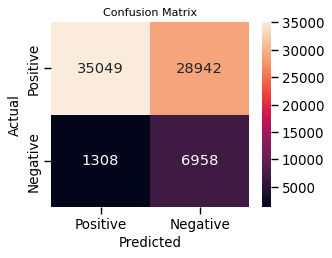

In [31]:
# Calculate the confusion matrix to understand the performance of the model 
conf_matrix = metrics.confusion_matrix(y_test,yhat)

# Applying temporary settings for seaborn so it would not affect other plots
with sns.plotting_context('notebook',font_scale=1.1):
    plt.figure(figsize=(4,3), dpi=80)

#Display the confusion matrix
    ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'])
    ax.set_title("Confusion Matrix", fontsize=10)
    ax.set_ylabel("Actual", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)

In [32]:
#Calculate now the forecast from a "no-skill" prediction and the probabilities of the logistic regression

In [33]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# generate the predicted probabilities from the logistic regression
# Use predict_proba method from lab to calculate the predicted probabilities for each class
# The second column of the output corresponds to the probability of the positive class('Charged Off')
lr_probs = logit_model.predict_proba(X_test)[:,1]

In [34]:
# We will print the sample of the no skill predictions
print('Sample of no-skill predictions:')
print(ns_probs[:10])

# We will also print the sample of the predicted probabilities from the ls_probs model 
print('\nSample of Logistic Regression Probabilities:')
print(lr_probs[:10])

Sample of no-skill predictions:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Sample of Logistic Regression Probabilities:
[0.55170678 0.43992828 0.45470831 0.27294201 0.54230637 0.37973353
 0.43838549 0.45537991 0.43605865 0.53522375]


In [35]:
#compare the logistic regression with the "no-skill" prediction based on the ROC curve.  

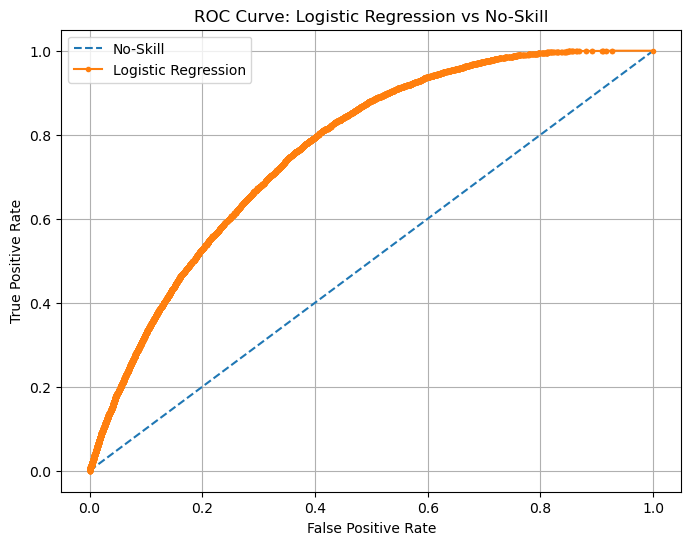

In [36]:
# we firstly need to import the necessary libraries for the roc curve and to calculate auc 
from sklearn.metrics import roc_curve 

# We firstly calculate calculate the ROC curve for the no skill prediction 
ns_fpr, ns_tpr, _ = roc_curve(y_test,ns_probs)

# Now calculate the roc curve for the Logistic regression model 
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Now we plot the roc curves to visually compare the logistic regression model with the no-skill prediction

plt.figure(figsize=(8,6)) # Set the size of the figure

#Plot the no-skill roc curve(diagonal line)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label = 'No-Skill')

# Now we plot the logistic regression roc curve 
plt.plot (lr_fpr, lr_tpr, marker= '.', label = 'Logistic Regression')

plt.xlabel('False Positive Rate') # Set the name for the X axis label
plt.ylabel('True Positive Rate') # Set the name for the Y axis label 
plt.title('ROC Curve: Logistic Regression vs No-Skill') # Sets the title name for the plot 
plt.legend() # Sets the legend to distinguish the curves 
plt.grid() # Creates the grid lines for clarity 

# Display the plot
plt.show()



In [37]:
#calculate the Area Under the Curve - AUC metric of the logistic regression model

In [38]:
# Firstly import the necessary function from the library  to calculate the scores 
from sklearn.metrics import roc_auc_score 

# Calculate the AUC for the No skill model 
ns_auc = roc_auc_score(y_test, ns_probs)

# Calculate the AUC score for the logistic regression model
lr_auc = roc_auc_score(y_test, lr_probs)

# Print the results, and compare them 
# Here we display the AUC scores for both models and compare their effectiveness
print('No-Skill Model: ROC AUC = %.3f' % (ns_auc))
print('Logistic Regression Model: ROC AUC= %.3f' % (lr_auc))

No-Skill Model: ROC AUC = 0.500
Logistic Regression Model: ROC AUC= 0.764


In [39]:
#estimating the classification tree without cross validation

In [40]:
# Import the necessary function from library 
from sklearn.tree import DecisionTreeClassifier

In [41]:
# Initialise the imported DecisionTreeClassifier function to create a classification tree making an instance of my model

clf_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data 
clf_tree.fit(X_train, y_train)

# Evaluate the model by predicting classes for the testing dataset(getting the predicted values)
y_pred_tree = clf_tree.predict(X_test)

# Calculate the score of my model(i.e. classification tree accuracy on training and testing sets)
train_accuracy_score = clf_tree.score(X_train, y_train)
test_accuracy_score = clf_tree.score(X_test, y_test)

# Printing the results for clarity 
print(f'Training accuracy(score) of Classification Tree: {train_accuracy_score:.3f}')
print(f'Testing accuracy(score) of Classification Tree: {test_accuracy_score:.3f}')

Training accuracy(score) of Classification Tree: 1.000
Testing accuracy(score) of Classification Tree: 0.849


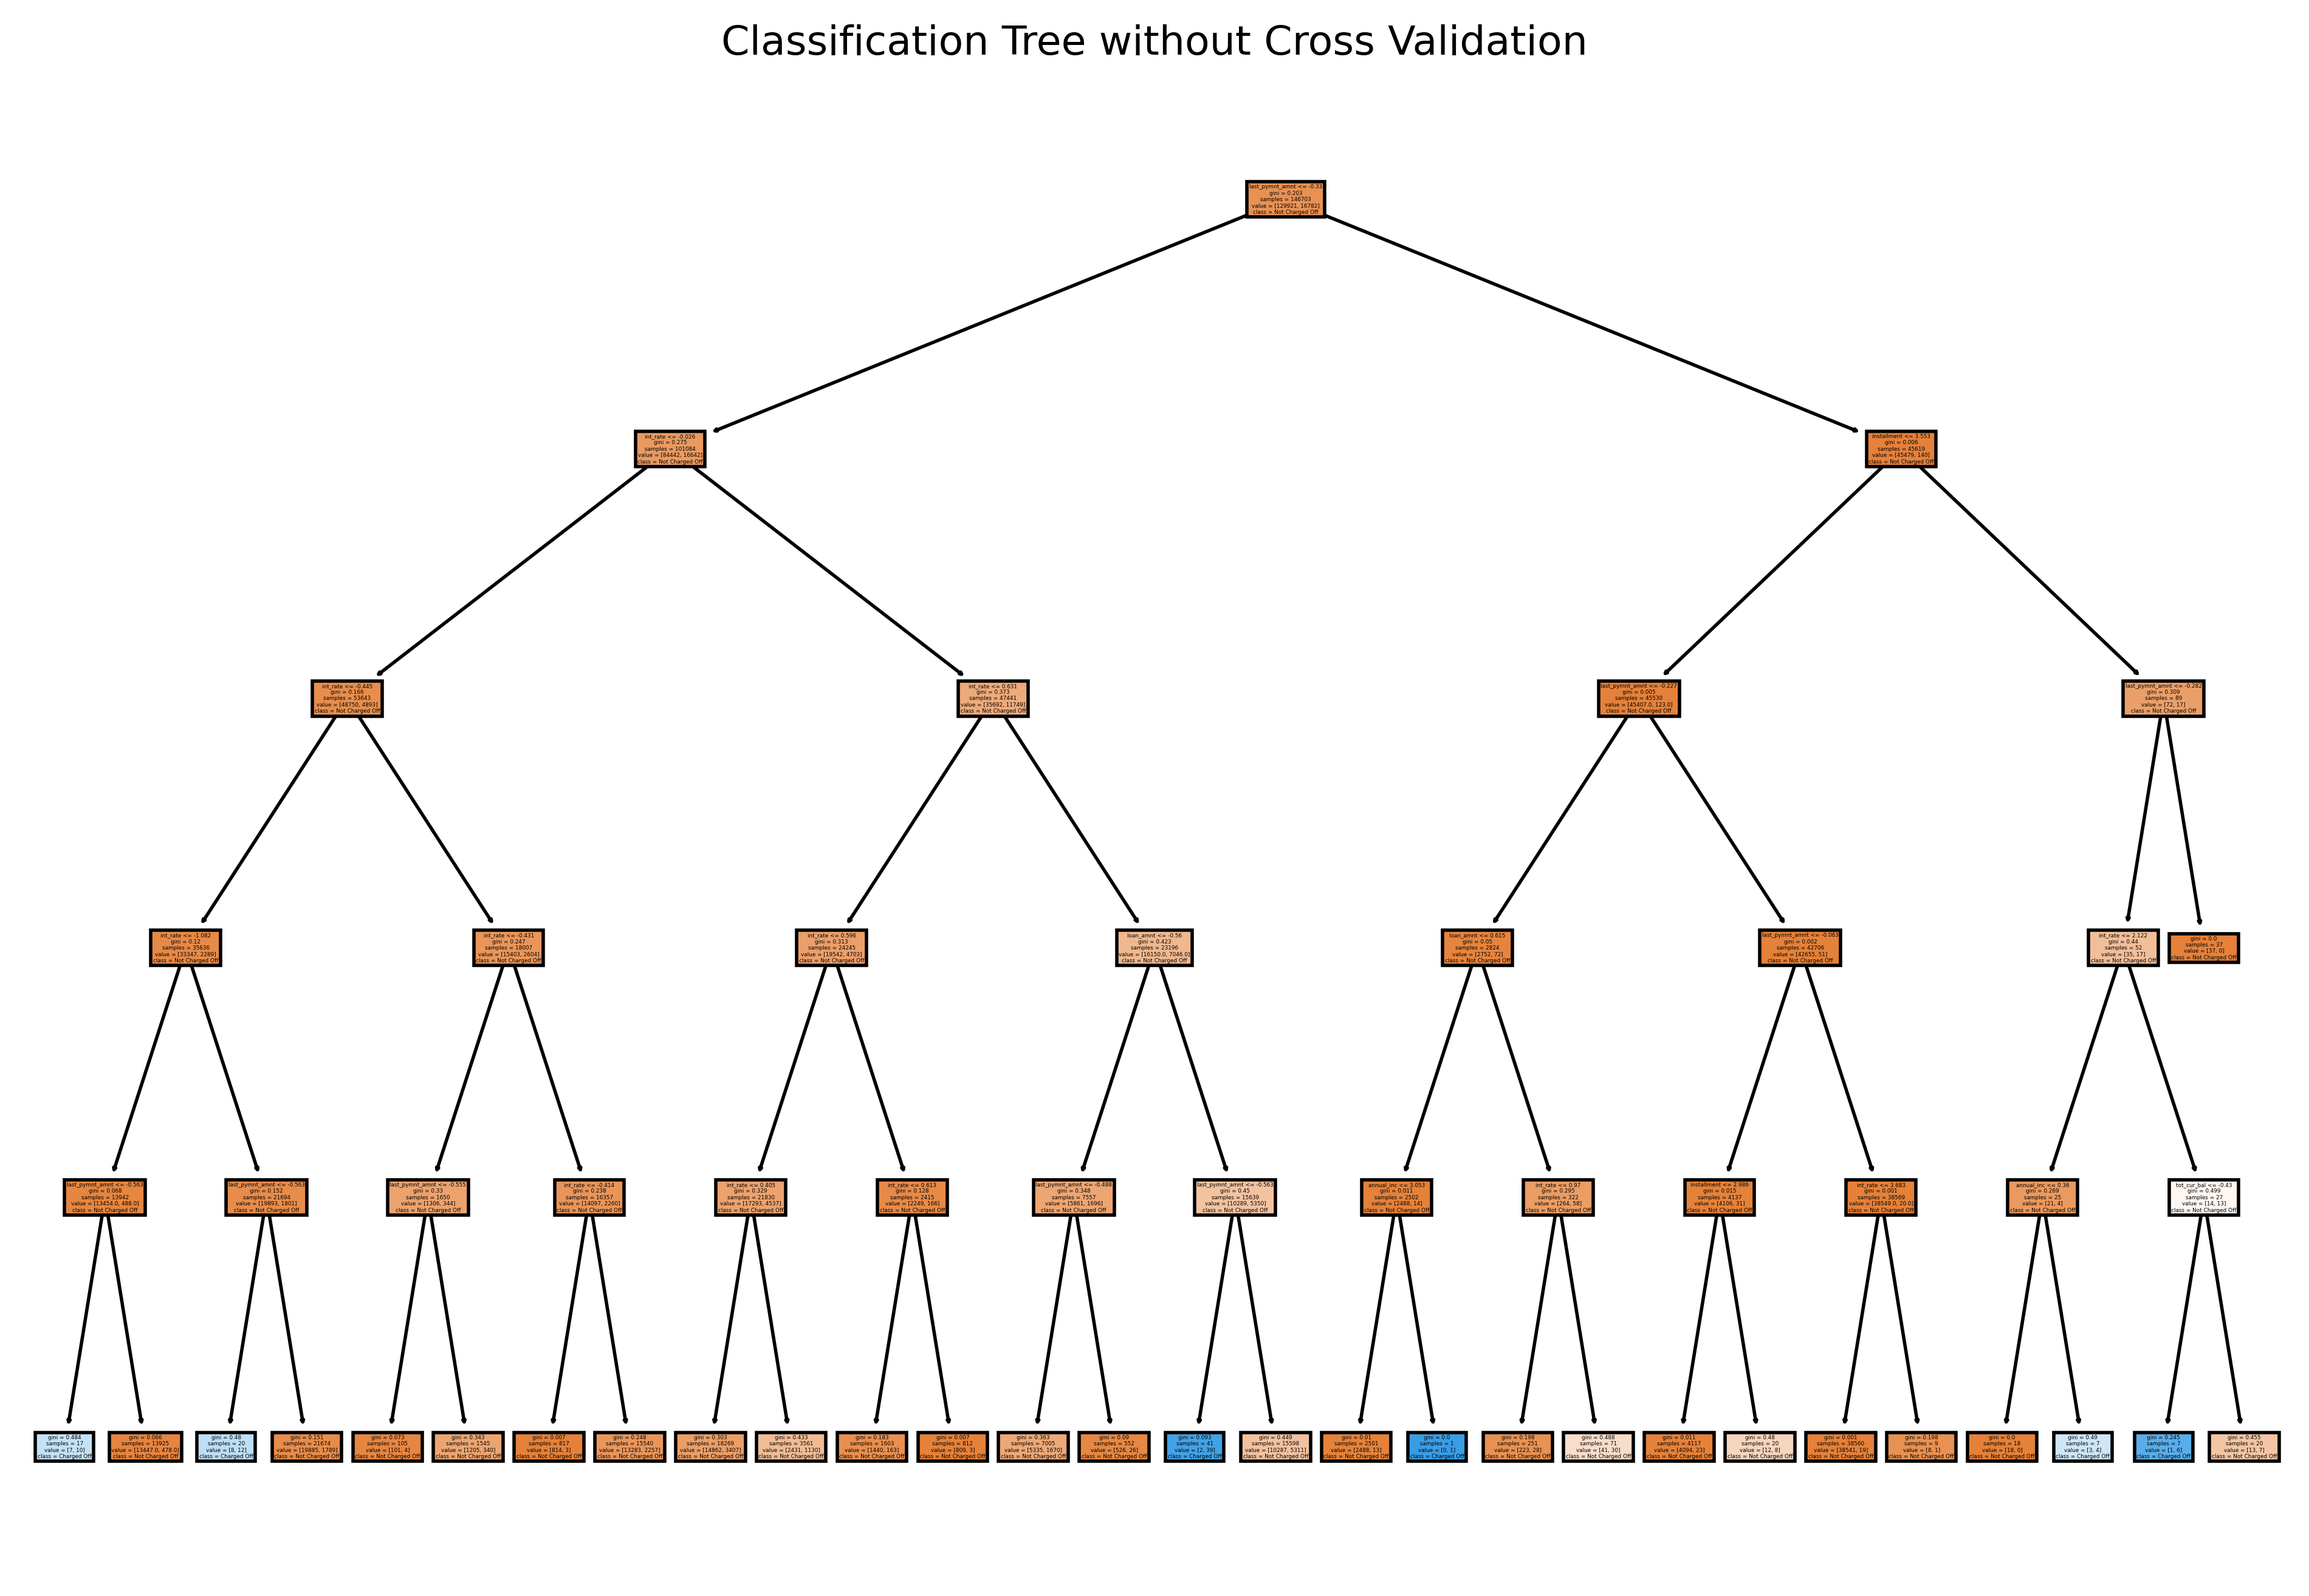

In [42]:
''' I will visualise the reduced version of tree with max depth of 5, (visualising the whole tree is 
computationally inneficient, and will take more time) to inspect how the decisions are made in this tree'''
clf_red_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_red_tree.fit(X_train,y_train)
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi=400)
plot_tree(
    clf_red_tree,
    feature_names = X.columns,# The names for the predictors
    class_names=['Not Charged Off', 'Charged Off'],# These are the label names for the target class variablkes
    filled = True 
)
plt.title("Classification Tree without Cross Validation")
plt.show()

In [43]:
#calculate the confusion matrix of the tree

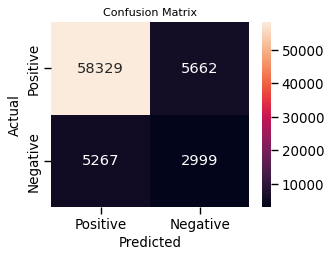

In [44]:
# We firstly need to import necessary libraries 
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix using the imported function
conf_matrix = metrics.confusion_matrix(y_test, y_pred_tree)

# Applying temporary settings for seaborn so it would not affect other plots
with sns.plotting_context('notebook',font_scale=1.1):
    plt.figure(figsize=(4,3), dpi=80)

#Display the confusion matrix
    ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'])
    ax.set_title("Confusion Matrix", fontsize=10)
    ax.set_ylabel("Actual", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)

In [45]:
#Calculate now the forecast from a "no-skill" prediction and the probabilities of the tree.

In [46]:
# We firstly generate the no-skill probability
ns_probs = [0 for _ in range(len(y_test))]

# Now we calculate the probabilities of the tree 
dt_probs = clf_tree.predict_proba(X_test)[:,1]

# Now we display the sample of the no skill predictions 
print('No-Skill prediction forecast:')
print(ns_probs[:10]) # Show first 10 no skill predictions

# Display the tree's probabilities
print('\nForecast of Classification Tree Predicted Probabilities:')
print(dt_probs[:10]) # Show first 10 samples


No-Skill prediction forecast:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Forecast of Classification Tree Predicted Probabilities:
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [47]:
#compare the tree with the "no-skill" prediction based on the ROC curve. 

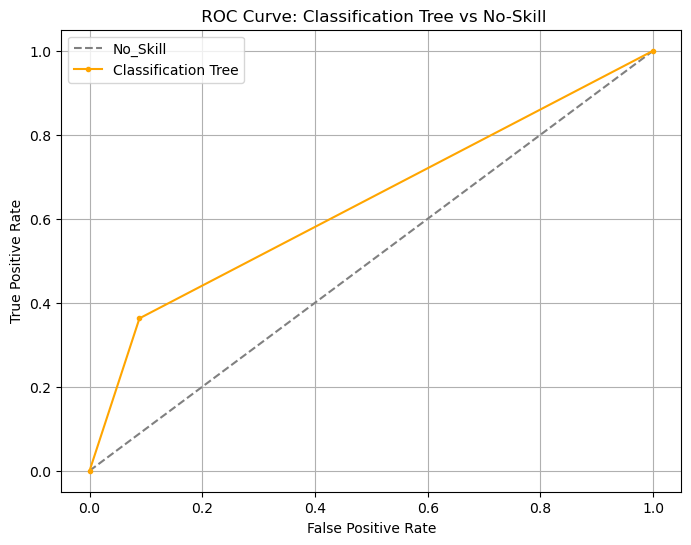

In [48]:
# We now calculate the ROC curve for the no skill prediction first 
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Now we also calculate the ROC curve for the Classification tree
# ROC curve in this case shows how well the tree distiguishes between the positive and negative classes 
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Now we start plotting the ROC Curves
#Firstly define the figure size 
plt.figure(figsize=(8,6))

# Plot the ROC curve for the no skill model 
# Diagonal line indicates random guessing 
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No_Skill', color = 'gray')

#Now plot the ROC curve for the classification tree 
plt.plot(dt_fpr, dt_tpr, marker='.', label = 'Classification Tree', color = 'orange')

# Adding the axis labels 
plt.xlabel('False Positive Rate') # Set the X axis label name 
plt.ylabel('True Positive Rate') # Set Y axis label name
plt.title(' ROC Curve: Classification Tree vs No-Skill') # Setting the plot title 
plt.legend() # Setting up a legend 
plt.grid() # Setting up grid lines

#Display the plot 
plt.show()


In [49]:
#calculate the Area Under the Curve - AUC metric of the tree.

In [50]:
# Firstly calculate the AUC for the Classification Tree
# I will use imported roc_auc_score function 
dt_auc = roc_auc_score(y_test, dt_probs)

# Now calculaye the AUC for the No skill model 
ns_auc = roc_auc_score(y_test, ns_probs)

#Display, and summarise the scores 
print('Classification Tree: ROC AUC=%.3f' % (dt_auc))
print('No-Skill: ROC AUC=%.3f' % (ns_auc))

Classification Tree: ROC AUC=0.637
No-Skill: ROC AUC=0.500


## Part 3: Classification tree with cross validation and random forest

In [51]:
#Let now re-calculate a classification tree but with cross validation. 
#Cross validate at least one hyperparameter e.g. max_depth

In [52]:
#estimate the tree with cross validation

In [53]:
# We firstly import necessary libraries for the decision tree but now with the cross validation 
from sklearn.model_selection import GridSearchCV

# We firstly define the Hyperparameter Grid, and cross validate three hyperparameters: max_depth, min_samples_split, min_samples_leaf
params_dt = {
    'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
    'min_samples_leaf':[10,20,30,40,50],
    'min_samples_split':[10,20,30]}

# Now we Set up cross validation using the imported GridSearchCV function 
dt_cv = GridSearchCV(estimator=clf_tree,
                     param_grid=params_dt,
                     scoring='roc_auc',
                     cv=5,
                     verbose=1,
                     n_jobs=-1)
# Perform the cross validation and fit the model 
dt_cv.fit(X_train, y_train)

Fitting 5 folds for each of 435 candidates, totalling 2175 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30],
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'min_samples_split': [10, 20, 30]},
             scoring='roc_auc', verbose=1)

In [54]:
best_model = dt_cv.best_estimator_
print(best_model)

DecisionTreeClassifier(max_depth=23, min_samples_leaf=50, min_samples_split=10,
                       random_state=42)


In [55]:
# Before calculating the confusion matrix we firstly need to calculate the new predicted values using the predict function 
y_dt_cv_pred = dt_cv.predict(X_test)

In [56]:
#calculate the confusion matrix

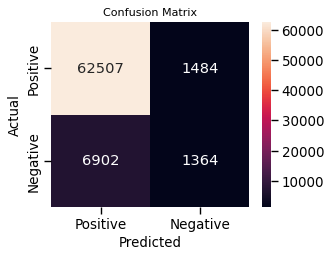

In [57]:
# Calculate the confusion matrix which compares the actual values(y_test) with the predicted values(y_dt_cv_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_dt_cv_pred)

#Display Confusion Matrix
# Applying temporary settings for seaborn so it would not affect other plots
with sns.plotting_context('notebook',font_scale=1.1):
    plt.figure(figsize=(4,3), dpi=80)

#Display the confusion matrix
    ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'])
    ax.set_title("Confusion Matrix", fontsize=10)
    ax.set_ylabel("Actual", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)

In [58]:
#Calculate now the forecast from a "no-skill" prediction and the probabilities of the cross validated tree.

In [59]:
# Firstly we generate the no-skill forecast 
ns_probs = [0 for _ in range(len(y_test))]

# Now we find the predicted probabilities ffrom the cross validated tree model 
cv_dt_probs = dt_cv.predict_proba(X_test)[:,1]

# Display the results
# Printing the samples forecast of no skill predictions
print(' Forecast sample of No-Skill Predictions:')
print(ns_probs[:10]) # Only display first 10 no skill predictions

# Print the probabilities of the cross validated tree
print('\nSample forecast of Predicted Probabilities (Cross-Validated Tree):')
print(cv_dt_probs[:10]) # Only display teh first 10 probabilities from the tree model 

 Forecast sample of No-Skill Predictions:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Sample forecast of Predicted Probabilities (Cross-Validated Tree):
[0.07575758 0.         0.04       0.         0.1        0.
 0.04       0.         0.17307692 0.29885057]


In [60]:
#compare the cross - validated tree with the "no-skill" prediction based on the ROC curve. 

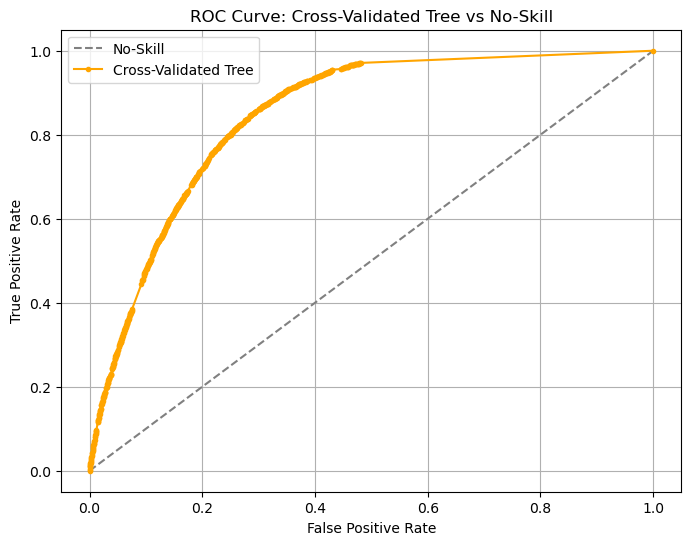

In [61]:
# Firstly calculate the ROC curve for No Skill Prediction 
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs) # Calculate FPR and TPR for no skill 

#Secondly, calculate the ROC Curve for the Cross validated tree 
cv_dt_fpr, cv_dt_tpr, _ = roc_curve(y_test,cv_dt_probs)

# Now we start plotting the ROC Curves 
# Create a plot ro compare the ROC curves of the no skill model and the cross validated tree
plt.figure(figsize=(8,6))

# Start with plotting the no skill ROC Curves
# Diagonal line represents the no skill prediction 
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label= 'No-Skill', color='gray')

# Plot the ROC Curve for the cross validated tree now 
plt.plot(cv_dt_fpr, cv_dt_tpr, marker='.', label='Cross-Validated Tree', color='orange')

# Add axis labels, title and the legend 
plt.xlabel('False Positive Rate') # Sets the name for the X axis label 
plt.ylabel('True Positive Rate') # Sets the name for the Y axis label 
plt.title('ROC Curve: Cross-Validated Tree vs No-Skill') # Sets the title for the plot 
plt.legend() # Sets the legend for the plot 
plt.grid() # Adds the grid lines 

# Display the plot
plt.show()

In [62]:
#calculate the Area Under the Curve - AUC metric of the cross validated tree.

In [63]:
# Firstly calculate again the AUC for the no skill model 
ns_auc = roc_auc_score(y_test, ns_probs)

# Additionally we will also calculate again the AUC for the classifcation tree without cross validation
dt_auc = roc_auc_score(y_test, dt_probs)

# Secondly, calculate the AUC for the cross validated tree 
cv_dt_auc = roc_auc_score(y_test,cv_dt_probs)

# Display the AUC Values for all three models
print('No-Skill: ROC AUC=%.3f' % (ns_auc))
print('Classification tree (without cross-validation): ROC AUC=%.3f' % (dt_auc))
print('Classification tree with Cross Validation: ROC AUC=%.3f' % (cv_dt_auc))

No-Skill: ROC AUC=0.500
Classification tree (without cross-validation): ROC AUC=0.637
Classification tree with Cross Validation: ROC AUC=0.847


In [64]:
#Estimate a Random Forest
#We now expand the set of models and include a random forest.
#The goal is to see if a more robust framework allows to have a more precise idea of the mortgage probability of default.

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Firstly we inirialise the Random forest classifier using the function that have been imported 
rf_model = RandomForestClassifier(random_state=42,bootstrap=False)

# Now we train the Random forest model using the training data. This fits the random forest to the data and learning patterns
rf_model.fit(X_train, y_train)

# Predict on Test set 
# We use the trained random forest model to predict on the test data
y_rf_pred = rf_model.predict(X_test) # Predict the class labels

# IN addition, for better data evaluation, we will also calculate the accuracy of the random forest model on a test dataset 
rf_accur = rf_model.score(X_test,y_test)

# Display the accuracy 
print(f'Random Forest Test Accuracy: {rf_accur:.3f}')

Random Forest Test Accuracy: 0.881


In [67]:
#calculate the confusion matrix

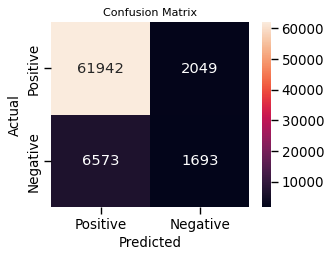

In [68]:
# Calculate the confusion matrix using the imported libraries
conf_matrix_rf = metrics.confusion_matrix(y_test, y_rf_pred)

# Display the confusion matrix to interpret the classification performance 
# Applying temporary settings for seaborn so it would not affect other plots
with sns.plotting_context('notebook',font_scale=1.1):
    plt.figure(figsize=(4,3), dpi=80)

#Display the confusion matrix
    ax = sns.heatmap(conf_matrix_rf, annot=True, fmt='d', )
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'])
    ax.set_title("Confusion Matrix", fontsize=10)
    ax.set_ylabel("Actual", fontsize=12)
    ax.set_xlabel("Predicted", fontsize=12)

In [69]:
#Calculate now the forecast from a "no-skill" prediction and the probabilities of the random forest.

In [70]:
# Generate the No skill prediction which assumes that all instances are classified as the majority class
ns_probs_rf = [0 for _ in range(len(y_test))]  # All predictions are zeros(majority class)

# Generate the predicted probabilities of the random forest for positive class
rf_probs = rf_model.predict_proba(X_test)[:,1]  # Probabilities for the positive class

# Display the results 
# Firstly display a few sample of no skill predictions 
print('Samples forecast from No-Skill prediction:')
print(ns_probs_rf[:10]) # Display the first 10 no skill predictions

# Now display the first 10 samples of the randomforest probabilities 
print('\nSample forecast of Random Forest Predicted Probabilities:')
print(rf_probs[:10]) # Displays the first 10 probabilities from the random forest 

Samples forecast from No-Skill prediction:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Sample forecast of Random Forest Predicted Probabilities:
[0.28 0.   0.05 0.   0.01 0.   0.   0.   0.23 0.12]


In [71]:
#compare the random forest with the "no-skill" prediction based on the ROC curve. 

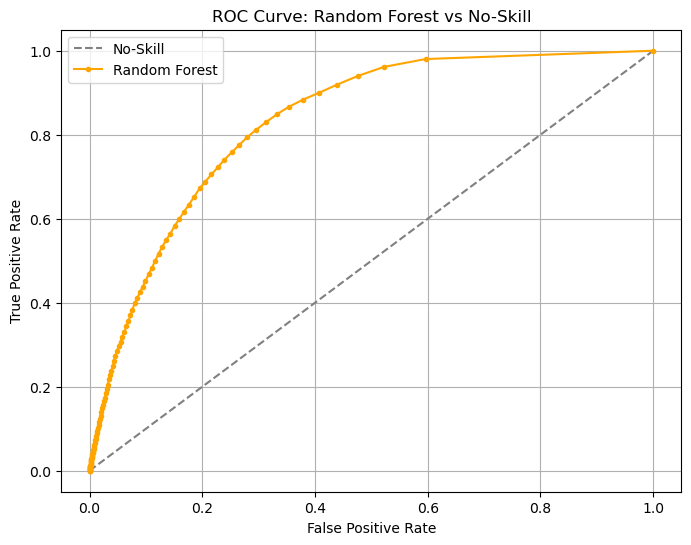

In [72]:
# Calculate the ROC Curve for the no skill prediction 
ns_fpr_rf, ns_tpr_rf, _ = roc_curve(y_test, ns_probs_rf)

# Calculate the ROC curve for the random forest model using the predicted probabilities for the positive class from random forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Plot the ROC Curves to compare the ROC curves of two models 
plt.figure(figsize=(8,6)) # Setting the figure size

# Plot the ROC curve for the no skill model
# Diagonal line represents the no skill prediction 
plt.plot(ns_fpr_rf, ns_tpr_rf, linestyle = '--', label = 'No-Skill', color = 'gray')

#Plot the ROC curve for the random forest model 
plt.plot(rf_fpr, rf_tpr, marker='.', label = 'Random Forest', color='orange')

# Setting the axis labels, title and the legend 
plt.xlabel('False Positive Rate') # X axis label name 
plt.ylabel('True Positive Rate') # Y axis label name 
plt.title('ROC Curve: Random Forest vs No-Skill') # Setting the title of the plot 
plt.legend() # Adds the legend
plt.grid() # Adds the grid to the plot

# Dsiplay the plot 
plt.show()

In [73]:
#calculate the Area Under the Curve - AUC metric of the random forest.

In [74]:
# Calculate the AUC for the no skill model
ns_auc_rf = roc_auc_score(y_test, ns_probs_rf)

# Calculate the AUC for the random forest model
rf_auc = roc_auc_score(y_test,rf_probs)

# Display the AUC values for both models
print('No-Skill Model: ROC AUC = %.3f' % (ns_auc_rf))
print('Random Forest Model: ROC AUC = %.3f' % (rf_auc))

No-Skill Model: ROC AUC = 0.500
Random Forest Model: ROC AUC = 0.831


## Compare the models

In [75]:
#compare the logistic Regression, the Classification Tree without cross validation, the classification tree with cross validation
# and the random forest based on the ROC curve.

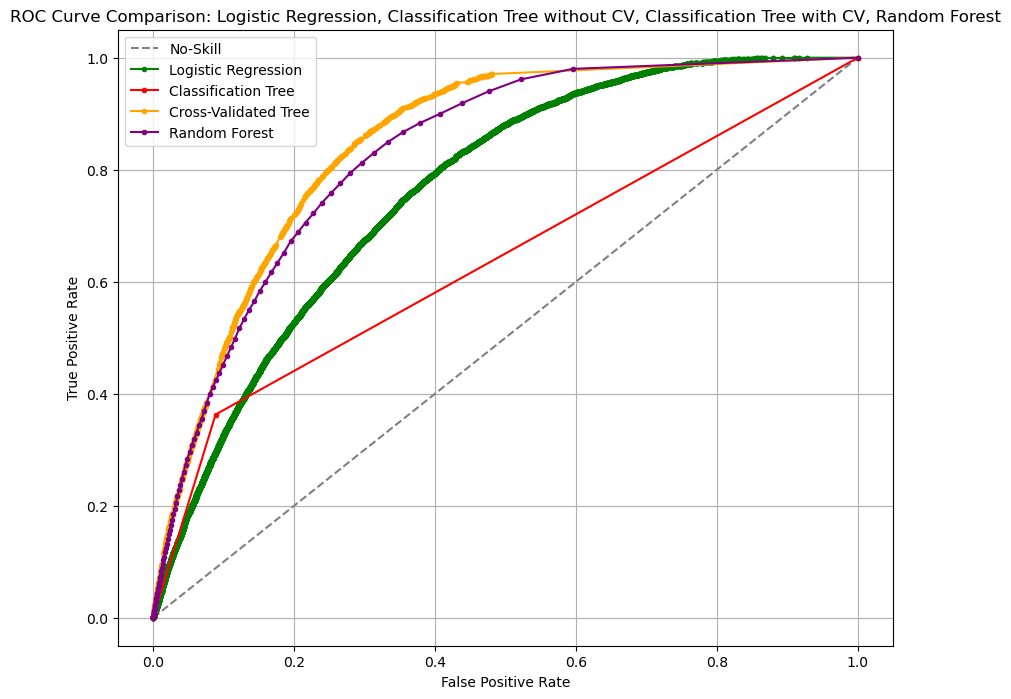

In [76]:
# We additionally calculate calculate the ROC curve for the no skill prediction 
ns_fpr, ns_tpr, _ = roc_curve(y_test,ns_probs)

# Calculate the ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

#Calculate the ROC curve for the Classification tree (without cross validation)
# ROC curve in this case shows how well the tree distiguishes between the positive and negative classes 
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

#Calculate the ROC Curve for the Cross validated tree 
cv_dt_fpr, cv_dt_tpr, _ = roc_curve(y_test,cv_dt_probs)

# Calculate the ROC curve for the random forest model using the predicted probabilities for the positive class from random forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

#Plot the ROC curves for all models
#Firstly create a plot to compare the ROC curves of all models
plt.figure(figsize=(10,8)) # Sets the figure size 

# Plot the ROC curve for each model
#Plot the no-skill roc curve(diagonal line)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label = 'No-Skill', color='gray')

# Now we plot the logistic regression roc curve 
plt.plot (lr_fpr, lr_tpr, marker= '.', label = 'Logistic Regression', color='green')

#Now plot the ROC curve for the classification tree 
plt.plot(dt_fpr, dt_tpr, marker='.', label = 'Classification Tree', color = 'red')

# Plot the ROC Curve for the cross validated tree now 
plt.plot(cv_dt_fpr, cv_dt_tpr, marker='.', label='Cross-Validated Tree', color='orange')

#Plot the ROC curve for the random forest model 
plt.plot(rf_fpr, rf_tpr, marker='.', label = 'Random Forest', color='purple')

# Adding the axis labels, title and the legend
plt.xlabel('False Positive Rate') # Set the name for X axis label 
plt.ylabel('True Positive Rate') # Set the name for Y axis label
plt.title('ROC Curve Comparison: Logistic Regression, Classification Tree without CV, Classification Tree with CV, Random Forest') # Set title
plt.legend() # Adds the legend to the plot 
plt.grid() # Adds the grid lines to the plot

# Display the ROC curves plot 
plt.show()

In [77]:
# We will also compare all models using the AUC
#Calculating scores
# Calculate the AUC for the No skill model 
ns_auc = roc_auc_score(y_test, ns_probs)

# Calculate the AUC score for the logistic regression model
lr_auc = roc_auc_score(y_test, lr_probs)

# Firstly calculate the AUC for the Classification Tree
# I will use imported roc_auc_score function 
dt_auc = roc_auc_score(y_test, dt_probs)

# Secondly, calculate the AUC for the cross validated tree 
cv_dt_auc = roc_auc_score(y_test,cv_dt_probs)

# Calculate the AUC for the random forest model
rf_auc = roc_auc_score(y_test,rf_probs)

# Print the results, and compare them 
# Here we display the AUC scores for both models and compare their effectiveness
print('No-Skill Model: ROC AUC = %.3f' % (ns_auc))
print('Logistic Regression Model: ROC AUC= %.3f' % (lr_auc))
print('Classification Tree: ROC AUC=%.3f' % (dt_auc))
print('Classification tree with Cross Validation: ROC AUC=%.3f' % (cv_dt_auc))
print('Random Forest Model: ROC AUC = %.3f' % (rf_auc))

No-Skill Model: ROC AUC = 0.500
Logistic Regression Model: ROC AUC= 0.764
Classification Tree: ROC AUC=0.637
Classification tree with Cross Validation: ROC AUC=0.847
Random Forest Model: ROC AUC = 0.831
